## 1) Library & Data Import

In [32]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [33]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
csvPath ='/content/drive/MyDrive/[2022]AICE자격증반/AICE예제/example1/data/Pokemon.csv'
df = pd.read_csv(csvPath)

In [35]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### Feature Description
- Name : 포켓몬 이름
- Type 1 : 포켓몬 타입 1
- Type 2 : 포켓몬 타입 2
- Total : 포켓몬 총 능력치 (Sum of Attack, Sp. Atk, Defense, Sp. Def, Speed and HP)
- HP : 포켓몬 HP 능력치
- Attack : 포켓몬 Attack 능력치
- Defense : 포켓몬 Defense 능력치
- Sp. Atk : 포켓몬 Sp. Atk 능력치
- Sp. Def : 포켓몬 Sp. Def 능력치
- Speed : 포켓몬 Speed 능력치
- Generation : 포켓몬 세대
- Legendary : 전설의 포켓몬 여부

-----

## 2) EDA (Exploratory Data Analysis : 탐색적 데이터 분석)

### 2-1) 기본 정보 탐색

##### 데이터셋 기본 정보 탐색

In [36]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


##### 개별 피처 탐색

In [38]:
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

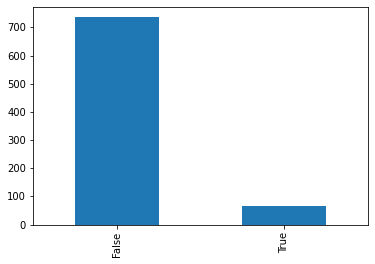

In [39]:
# value_counts로 확인한 갯수를 bar그래프로 그려보기
df['Legendary'].value_counts().plot(kind='bar')

In [40]:
print(df['Type 1'].unique())
print(len(df['Type 1'].unique()))

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
18


In [41]:
# 'TYPE 2'컬럼에 nan값이 하나의 이름으로 카운트 되어 있다.
print(df['Type 2'].unique())
print(len(df['Type 2'].unique()))

['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']
19


In [42]:
# null이 아닌 값의 행만 (조건필터로) 골라낸다.
df[df['Type 2'].notnull()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Type 2의 결측치를 해결하기 위해 Type 1과 Type 2를 하나의 컬럼으로 만든다.
### 포케몬의 Type이 하나 밖에 존재하지 않는 것이 있다.
### 데이터셋의 특성을 이해해야 알 수 있는 내용이다.

-----

### 2-2) 데이터 특징 탐색

##### 변수들의 분포 탐색

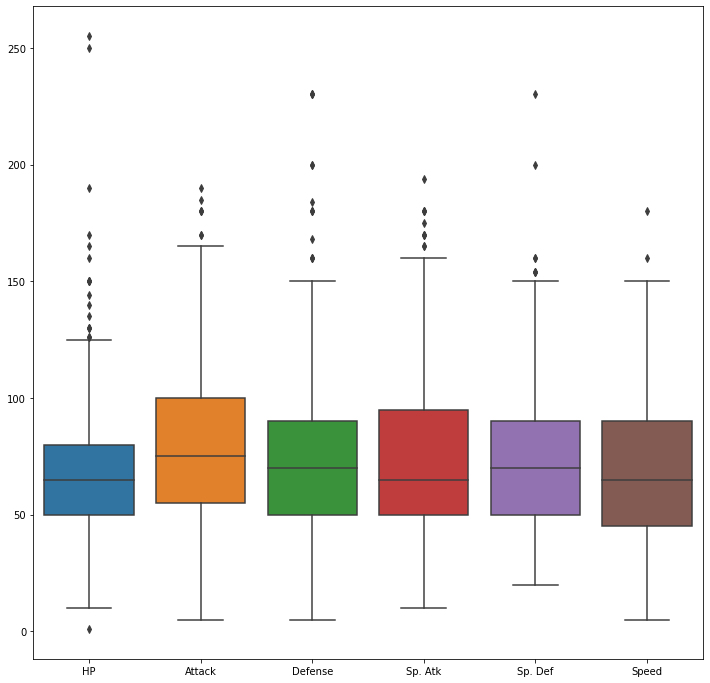

In [44]:
# 각 컬럼별로 데이터 분포가 어떤가?
# boxplot()함수를 사용하면 평균과 분산, 이상치에 대한 대략적인 내용을 살펴볼 수 있다.
fig = plt.figure(figsize=(12,12))
# 여러 개의 컬럼 값을 동시에 확인하기 위해 gca()함수 사용
ax =fig.gca()
# boxplot은 수치데이터만 그래프로 그릴 수 있다.
sns.boxplot(data=df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], ax=ax)
plt.show()

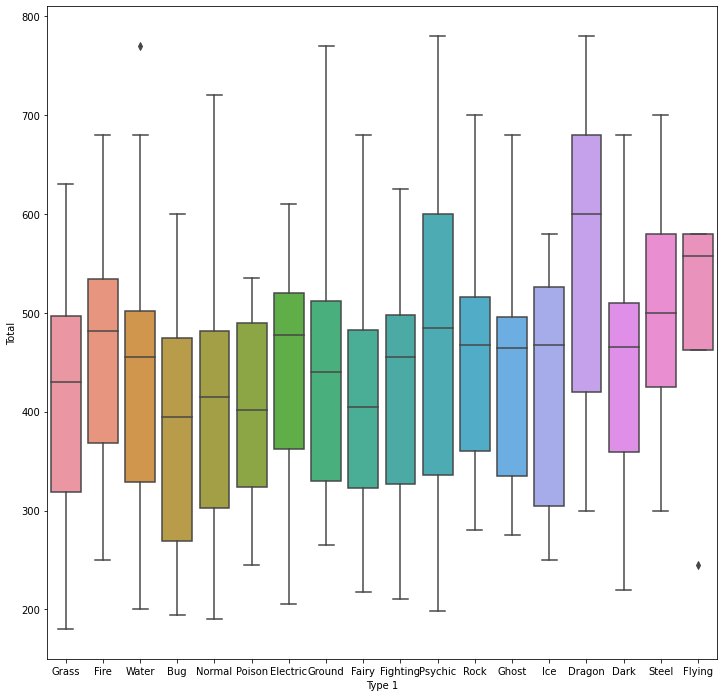

In [45]:
# 각 컬럼별로 데이터 분포가 어떤가?
# boxplot()함수를 사용하면 평균과 분산, 이상치에 대한 대략적인 내용을 살펴볼 수 있다.
fig = plt.figure(figsize=(12,12))
# 여러 개의 컬럼 값을 동시에 확인하기 위해 gca()함수 사용
ax =fig.gca()
# boxplot은 수치데이터만 그래프로 그릴 수 있다.
sns.boxplot(x='Type 1', y="Total", data=df, ax=ax)
plt.show()

-----

## 3) 지도 학습 기반 분류 분석

### 3-1) 데이터 전처리

##### 데이터 타입 변경

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [47]:
# 데이터 타입 바꾸기
df['Legendary'] = df['Legendary'].astype(int)
df['Generation'] = df['Generation'].astype(str)

# preprocessed_df = df[['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 
#                       'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']]

# 특정 컬럼만 삭제할때 axis=1로 설정하고 drop함수를 사용
preprocessed_df = df.drop(['#','Name'], axis=1)
preprocessed_df

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Fire,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,1
796,Rock,Fairy,700,50,160,110,160,110,110,6,1
797,Psychic,Ghost,600,80,110,60,150,130,70,6,1
798,Psychic,Dark,680,80,160,60,170,130,80,6,1


##### one-hot encoding

In [48]:
# Type 1을 one-hot encoding타입으로 변환
encoded_df = pd.get_dummies(preprocessed_df['Type 1'])
encoded_df.head(10)

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
# type 2가 결측치가 매우 많고, 이는 포케몬의 type이 하나만 있는 경우가 있어서 발생
# type 1과 type 2의 컬럼을 하나로
def make_list(x1,x2):
    type_list=[]
    type_list.append(x1)
    if x2 is not np.nan:
        type_list.append(x2)
    return type_list

preprocessed_df['Type']= preprocessed_df.apply(lambda x: make_list(x['Type 1'], x['Type 2']), axis=1)
preprocessed_df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,Grass,Poison,318,45,49,49,65,65,45,1,0,"[Grass, Poison]"
1,Grass,Poison,405,60,62,63,80,80,60,1,0,"[Grass, Poison]"
2,Grass,Poison,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"
3,Grass,Poison,625,80,100,123,122,120,80,1,0,"[Grass, Poison]"
4,Fire,NaN,309,39,52,43,60,50,65,1,0,[Fire]


In [50]:
# 'Type 1'과 'Type 2'컬럼 삭제
preprocessed_df = preprocessed_df.drop(['Type 1','Type 2'], axis=1)
preprocessed_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,318,45,49,49,65,65,45,1,0,"[Grass, Poison]"
1,405,60,62,63,80,80,60,1,0,"[Grass, Poison]"
2,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"
3,625,80,100,123,122,120,80,1,0,"[Grass, Poison]"
4,309,39,52,43,60,50,65,1,0,[Fire]
...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6,1,"[Rock, Fairy]"
796,700,50,160,110,160,110,110,6,1,"[Rock, Fairy]"
797,600,80,110,60,150,130,70,6,1,"[Psychic, Ghost]"
798,680,80,160,60,170,130,80,6,1,"[Psychic, Dark]"


In [51]:
# 앞에서 one-hot encoding했던 데이터프레임과 합치기 - MultiLabelBinarizer를 사용해서 합치기
from sklearn.preprocessing import MultiLabelBinarizer

# Type 1은 one-hot encoding이 되어 있지만
# Type 2는 one-hot encoding이 되어 있지 않은 것이 존재
mlb = MultiLabelBinarizer()
preprocessed_df = preprocessed_df.join(pd.DataFrame(mlb.fit_transform(preprocessed_df.pop('Type')),
                                                    columns=mlb.classes_))
preprocessed_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,318,45,49,49,65,65,45,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6,1,0,...,0,0,0,0,0,0,0,1,0,0
796,700,50,160,110,160,110,110,6,1,0,...,0,0,0,0,0,0,0,1,0,0
797,600,80,110,60,150,130,70,6,1,0,...,1,0,0,0,0,0,1,0,0,0
798,680,80,160,60,170,130,80,6,1,0,...,0,0,0,0,0,0,1,0,0,0


##### 피처 표준화

##### 데이터셋 분리

In [54]:
from sklearn.model_selection import train_test_split

#X=preprocessed_df.loc[:, preprocessed_df.columns != 'Legendary']
X=preprocessed_df.drop('Legendary', axis=1)
y=preprocessed_df['Legendary']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((640, 26), (160, 26), (640,), (160,))

-----

### 3-2) Logistic Regression 모델 학습

##### 모델 학습

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression(random_state=123)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

##### 모델 평가

In [56]:
# classification result for test dataset
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.93
Precision : 0.800
Recall : 0.286
F1 : 0.421


-----

### 3-3) 클래스 불균형 조정

In [57]:
preprocessed_df['Legendary'].value_counts()

0    735
1     65
Name: Legendary, dtype: int64

##### 1:1 샘플링 ( 클래스 레이블의 갯수가)

In [58]:
positive_random_idx = preprocessed_df[preprocessed_df['Legendary']==1].index.tolist()

# sample함수를 활용하면 주어진 데이터셋중에 내가 원하는 갯수만큼 뽑아서 데이터를 사용할 수 있다. 
negative_random_idx = preprocessed_df[preprocessed_df['Legendary']==0].sample(65, random_state=33).index.tolist()

In [60]:
len(positive_random_idx), len(negative_random_idx)

(65, 65)

##### 데이터셋 분리

In [62]:
#X=preprocessed_df.loc[:, preprocessed_df.columns != 'Legendary']
random_idx = positive_random_idx+negative_random_idx

# 'Legendary' 컬럼은 삭제하고 X에 저장해라. 행은 random_idx의 것을 참조해라.
X=preprocessed_df.loc[random_idx, preprocessed_df.columns!='Legendary']

# y도 random_idx행만 사용해라.
y=preprocessed_df['Legendary'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((104, 26), (26, 26), (104,), (26,))

##### 모델 재학습

In [63]:
model = LogisticRegression(random_state=123)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [64]:
# classification result for test dataset
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.85
Precision : 0.867
Recall : 0.867
F1 : 0.867


## 4) 비지도 학습 기반 군집 분류 분석

### 4-1) Kmeans 군집 분류

##### 2차원 군집 분석 (Kmeans)

##### 군집 시각화

##### 다차원 군집 분석 (Kmeans)

##### 군집별 특성 시각화